<a href="https://colab.research.google.com/github/bork0047/Data-Analysis/blob/main/Interest_Comparison_Videogames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16105 sha256=97a454f0e232239edae6393a35dfd0fa07e02572faf6486b1132a6d94352b7b7
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e8\78\c8\18d4f4804753e14416809b365773220c48b41fe5387f2bb6b9
Successfully built pytrends
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pytrends.request import TrendReq

#create a pytrend object data from google trends
pytrends = TrendReq(hl='en-US')

#extract data about keywords
keywords = ['World of Warcraft', 'Warframe', 'Call of Duty']
pytrends.build_payload(keywords, timeframe = 'today 5-y')

#specify the get data
data = pytrends.interest_over_time()

#print the data
data

,World of Warcraft,Warframe,Call of Duty,isPartial
date,,,,
2017-11-05,9,31,84,False
2017-11-12,7,32,53,False
2017-11-19,6,32,57,False
2017-11-26,6,27,46,False
2017-12-03,6,27,40,False
...,...,...,...,...
2022-09-25,4,12,30,False
2022-10-02,4,13,25,False
2022-10-09,3,12,26,False


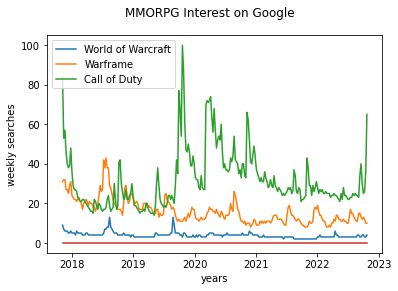

<Figure size 432x288 with 0 Axes>

In [ ]:
#upon reviewing the data, we can see that it is too hard to analyze as it is 260 rows

#so in this case, I will plot the data so it is more eye-candy-like

import matplotlib.pyplot as plt

plt.plot(data)

#add titles
plt.suptitle('MMORPG Interest on Google')
plt.xlabel('years')
plt.ylabel('weekly searches')

#make a small legend to show which value is which
#default legend is upper right
plt.legend(keywords, loc = 'upper left')

plt.show()
plt.savefig('data.png')

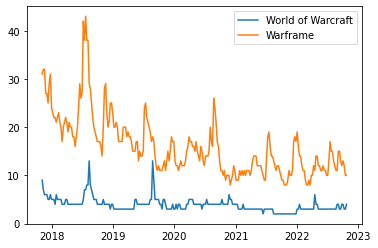

In [ ]:
#analyze specific data based on its name
focus = ['World of Warcraft', 'Warframe']

plt.plot(data[focus])
plt.legend(focus)

In [ ]:
#analyze which country based on keywords
data2 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the highest search of "World of Warcraft"
data2 = data2['World of Warcraft'].nlargest(10)
data2

geoName
Faroe Islands    35
Denmark          21
Sweden           20
Bulgaria         19
Iceland          18
Czechia          17
Norway           17
St. Helena       16
Malta            14
Slovakia         14
Name: World of Warcraft, dtype: int32

In [ ]:
type(data2)

pandas.core.series.Series

In [ ]:
data2 = data2.to_frame()
data2

,World of Warcraft
geoName,
Faroe Islands,35
Denmark,21
Sweden,20
Bulgaria,19
Iceland,18
Czechia,17
Norway,17
St. Helena,16
Malta,14


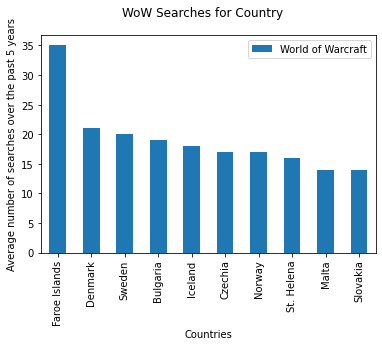

In [ ]:
#plot bar chart with pandas (so much easier than matplotlib, much much easier)
data2.plot(kind='bar')

#titles adding
plt.suptitle('WoW Searches for Country')
plt.xlabel('Countries')
plt.ylabel('Average number of searches over the past 5 years')

plt.show()

In [ ]:
#plot a bar chart with ALL the keywords
data3 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

data3 = data3[55:60]
data3

,World of Warcraft,Warframe,Call of Duty
geoName,,,
Cuba,9,1,90
Curaçao,0,20,80
Cyprus,10,30,60
Czechia,17,28,55
Côte d’Ivoire,0,0,100


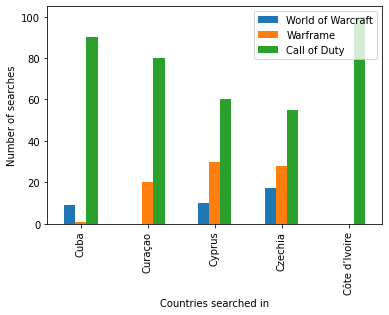

In [ ]:
data3.plot(kind = 'bar')
plt.ylabel('Number of searches')
plt.xlabel('Countries searched in')
plt.show()